In [1]:
# Importando as Blibiotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install pmdarima
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
url = 'https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/Estudo%20COVID%20-%20Insights%20e%20Previs%C3%B5es/dados/Silver/datasets/serie%20temporal%20pais/S%C3%A9ries%20Temporais%20Chile.csv'

serie_chi = pd.read_csv(url)
serie_chi.drop(['Unnamed: 0','Confirmed','Recovered','Ano'],axis=1,
               inplace=True)
serie_chi['Date'] = pd.to_datetime(serie_chi['Date'],format='%Y-%m-%d')
serie_chi.set_index('Date',inplace=True)
serie_chi.head()

,Deaths
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [4]:
# Selecionando apenas os primeiros meses do dataset
serie_chi = serie_chi[0:161]

In [5]:
treino = serie_chi[0:131]
teste = serie_chi[131:161]

In [6]:
step1 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=884.436, Time=0.17 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=868.704, Time=0.42 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=869.384, Time=1.19 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=867.711, Time=0.29 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=869.123, Time=0.54 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=869.354, Time=2.69 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=869.563, Time=0.39 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=870.870, Time=0.89 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=871.301, Time=1.57 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=790.971, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=791.654, Time=0.29 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=793.140, Time=0.87 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=791.271, Time=0.26 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=790.780, Time=0.55 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=792.645, Time=2.26 sec
 ARIMA(0,1

In [7]:
step2 = auto_arima(treino['Deaths'],start_p=1,start_q=1,max_p=6,max_q=6,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,
                    error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=621.120, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=884.436, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=637.914, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=791.654, Time=0.28 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=639.225, Time=0.14 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.55 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=620.744, Time=1.82 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=4.22 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=793.140, Time=0.80 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=629.077, Time=0.84 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=inf, Time=2.33 sec
 ARIMA(1,1,2)(0,1,2)[12]             : AIC=inf, Time=2.07 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=869.384, Time=0.74 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=738.485, Time=1.30 sec
 ARIMA(2,1,0)(0,1,2)[12]             : AIC=inf, T

In [8]:
step1.fit(treino['Deaths'])

ARIMA(order=(2, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [9]:
step2.fit(treino['Deaths'])

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [10]:
future_forecast=step1.predict(n_periods=len(teste))

In [11]:
future_forecast1 = step2.predict(n_periods=len(teste))

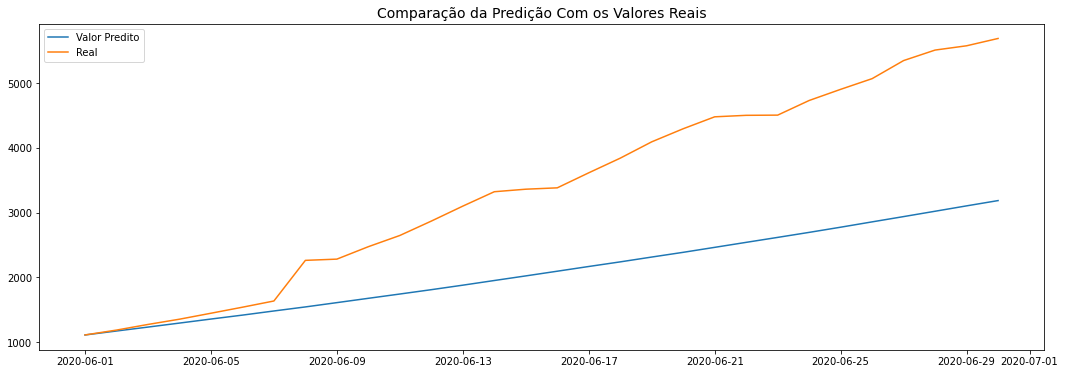

In [16]:
plt.figure(figsize=(18,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [13]:
mae = mean_absolute_error(teste['Deaths'],future_forecast)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast)
rmse = mean_squared_error(teste['Deaths'],future_forecast)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 1289.1529212614373
MAPE: 0.321140659651138
RMSE: 1540.5914022371237


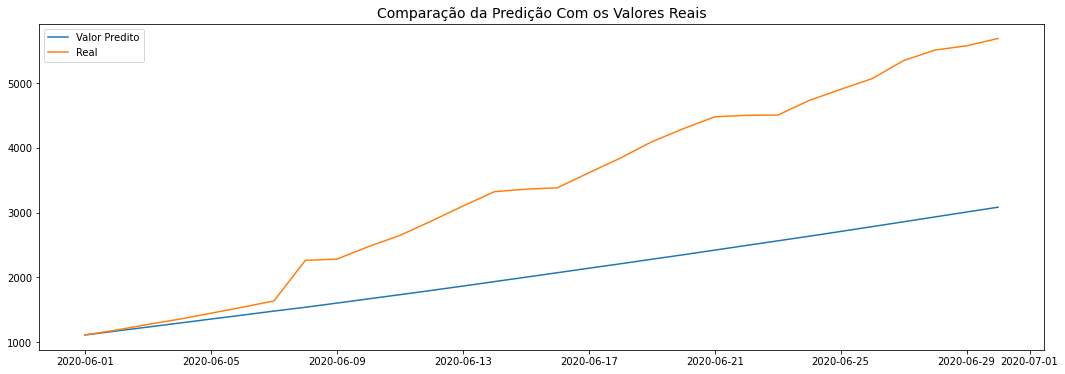

In [15]:
plt.figure(figsize=(18,6))
plt.title('Comparação da Predição Com os Valores Reais', fontsize=14)
plt.plot(teste.index,future_forecast1,label='Valor Predito')
plt.plot(teste.index,teste['Deaths'].values,label='Real')
plt.legend()

In [17]:
mae = mean_absolute_error(teste['Deaths'],future_forecast1)
mape = mean_absolute_percentage_error(teste['Deaths'],future_forecast1)
rmse = mean_squared_error(teste['Deaths'],future_forecast1)

print('MAE:',mae)
print('MAPE:',mape)
print('RMSE:',np.sqrt(rmse))

MAE: 1321.3998245039813
MAPE: 0.3283350000406008
RMSE: 1583.3572161325533
